# Exercise: Machine Learning with Python

## Part 1: Regression

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression


X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + np.random.normal(3, 1, 4)

In [7]:
np.array([1, 2, 3, 4]).reshape(4, 1)

array([[1],
       [2],
       [3],
       [4]])

In [4]:
X.shape

(4, 2)

In [27]:
X[:, 1]

array([1, 2, 2, 3])

In [4]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9750954170059314

In [5]:
reg.coef_, reg.intercept_ 

(array([3.34610928, 1.82933306]), 0.16196967154095354)

In [6]:
x_unknown = [3, 5]

y_pred,  = reg.predict(np.array([x_unknown]))

y_pred

19.346962819144956

## Question

* Plot each feature in X vs y as a scatter with the predictions for X as a line
* HINT: each column of X is a feature

### Solution

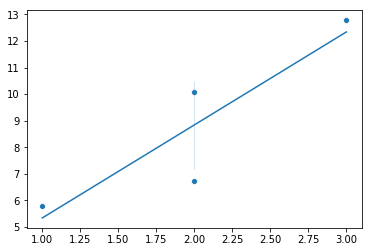

In [9]:
import seaborn as sns
sns.scatterplot(X[:,1], y)
sns.lineplot(X[:,1], reg.predict(X))

## Part 2: Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [12]:
# iris = datasets.load_iris()
iris = datasets.load_breast_cancer()

X = iris.data[:, :2]
y = iris.target

X[:5, :], y

(array([[17.99, 10.38],
        [20.57, 17.77],
        [19.69, 21.25],
        [11.42, 20.38],
        [20.29, 14.34]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)
clf.score(X, y)

0.8945518453427065

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x1_range = np.linspace(x_min, x_max, 100) 
x2_range = np.linspace(y_min, y_max, 100)

x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x1_grid.shape

(100, 100)

In [9]:
x1_x2 = np.c_[x1_grid.ravel(), x2_grid.ravel()]

Yp = clf.predict(x1_x2)
Yp = Yp.reshape(x1_grid.shape)

# x1_x2[:1, :],  Y[:1, 1]

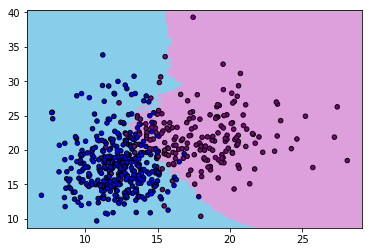

In [10]:
plt.pcolormesh(x1_grid, x2_grid, Yp, cmap=ListedColormap(['plum', 'palegreen', 'skyblue']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['purple', 'green', 'blue']), edgecolor='k', s=20)

### Question

* Load the breast cancer data set from sklearn
* Run the KNN algorithm and plot the resulting decision surface 
* Show the score of the KNN algorithm on the breast cancer set

## Part 3: Clustering

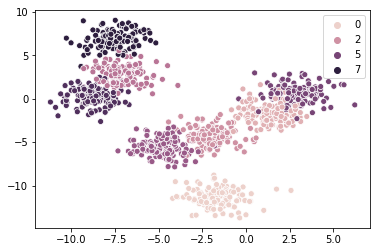

In [130]:
from sklearn.datasets import make_blobs


features, labels = make_blobs(
    n_samples = 1000,
    n_features = 2,
    cluster_std = 1,     
    center_box=(-12.0, 12.0),
    centers = np.random.randint(1, 10),
    random_state = 2   
)

sns.scatterplot(
    x = features[:,0],
    y = features[:,1],
    hue = labels
)

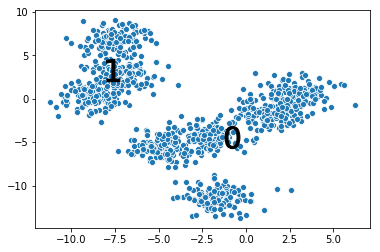

In [140]:
model = KMeans(n_clusters = np.random.randint(1, 10))
model.fit(features)

sns.scatterplot(
    x = features[:,0],
    y = features[:,1]
)


for index, center in enumerate(model.cluster_centers_):
    plt.scatter(center[0], center[1], 
                marker = f'${index}$',
                s = 500,
                color = 'black')

In [132]:
model.inertia_

2850.743376997782

### Question

* Plot the model inertia for `n_clusters` from 1 to 10
* Print the "best" number of clusters and their centers